<a href="https://colab.research.google.com/github/gchaewon/ML_team11/blob/main/experiment_closed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Download the dataset

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b95exRz8srcc_2_NV3fRta-6RGbrWtW4' -O closed_data.csv

--2023-12-10 14:42:52--  https://docs.google.com/uc?export=download&id=1b95exRz8srcc_2_NV3fRta-6RGbrWtW4
Resolving docs.google.com (docs.google.com)... 74.125.139.139, 74.125.139.113, 74.125.139.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.139.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fvlb4g62gvnif4bb2tce84tq8hv0eihh/1702219350000/02545855121528690953/*/1b95exRz8srcc_2_NV3fRta-6RGbrWtW4?e=download&uuid=cb2da9c6-5ea2-4813-a540-52a686cadf5a [following]
--2023-12-10 14:42:54--  https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fvlb4g62gvnif4bb2tce84tq8hv0eihh/1702219350000/02545855121528690953/*/1b95exRz8srcc_2_NV3fRta-6RGbrWtW4?e=download&uuid=cb2da9c6-5ea2-4813-a540-52a686cadf5a
Resolving doc-04-ac-docs.googleusercontent.com (doc-04-ac-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0

In [ ]:
import pandas as pd
data = pd.read_csv('closed_data.csv')

data.head()

,count_out,avg_out_order,burst_mean,first_in,mean_out_order,packet_size_std,fraction_in,std_out_order,fraction_out,time_stamp_max,...,avg_in_order,mean_in_order,count_in,count_total,c_packet_size_mean,c_packet_size_min,burst_std,burst_max,time_stamp_std,time_stamp_mean
0,121.0,773.322314,-3869.538462,21.0,773.322314,285.805275,0.914849,515.483953,0.085151,10.14,...,704.106154,704.106154,1300.0,1421.0,-307557.787474,-605184.0,7789.548217,4096.0,1.128342,4.315749
1,80.0,226.162500,-1949.957447,22.0,226.162500,370.043045,0.845560,139.231951,0.154440,10.16,...,264.406393,264.406393,438.0,518.0,-86710.857143,-184320.0,5249.774082,2560.0,1.370610,4.611815
2,118.0,786.110169,-3779.368421,23.0,786.110169,288.437706,0.913108,472.735508,0.086892,11.11,...,668.259677,668.259677,1240.0,1358.0,-297018.438881,-575488.0,7556.379781,3072.0,1.179265,5.488969
3,122.0,820.139344,-3846.400000,21.0,820.139344,284.613550,0.915629,513.916038,0.084371,13.36,...,713.503021,713.503021,1324.0,1446.0,-316360.409405,-615936.0,7779.407319,2560.0,1.708888,5.995512
4,115.0,789.608696,-3810.835443,22.0,789.608696,280.625206,0.918208,503.993490,0.081792,10.64,...,694.740511,694.740511,1291.0,1406.0,-308565.940256,-602624.0,7380.684093,2560.0,1.297085,4.698869


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Xh2L-34sucnBm5ISkQIwguo2o_etzihX' -O closed_target.csv

--2023-12-10 14:43:15--  https://docs.google.com/uc?export=download&id=1Xh2L-34sucnBm5ISkQIwguo2o_etzihX
Resolving docs.google.com (docs.google.com)... 74.125.139.139, 74.125.139.113, 74.125.139.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.139.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i5ltie5a7e7v3a2seufqhrsvj3p6mn8r/1702219350000/02545855121528690953/*/1Xh2L-34sucnBm5ISkQIwguo2o_etzihX?e=download&uuid=eb892593-5892-483c-ba24-643f8e01e935 [following]
--2023-12-10 14:43:15--  https://doc-08-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i5ltie5a7e7v3a2seufqhrsvj3p6mn8r/1702219350000/02545855121528690953/*/1Xh2L-34sucnBm5ISkQIwguo2o_etzihX?e=download&uuid=eb892593-5892-483c-ba24-643f8e01e935
Resolving doc-08-ac-docs.googleusercontent.com (doc-08-ac-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0

In [ ]:
target = pd.read_csv('closed_target.csv')
target.head()

,web_site
0,0
1,0
2,0
3,0
4,0


Split into training and testing sets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = data.to_numpy(), target.to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

check accuracy before tunning

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8147368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.85      0.81      0.83        42
           2       0.78      0.88      0.83        41
           3       0.79      0.85      0.82        40
           4       0.78      0.93      0.85        30
           5       0.93      0.77      0.84        35
           6       0.76      0.88      0.82        33
           7       0.76      0.91      0.83        43
           8       0.78      0.89      0.83        36
           9       0.86      0.81      0.83        52
          10       0.94      0.75      0.84        44
          11       0.78      0.78      0.78        40
          12       0.80      1.00      0.89        39
          13       0.81      0.63      0.71        41
          14       0.74      0.70      0.72        33
          15       0.72      0.78      0.75        40
          16       0.83    

## 1. Tunning Experiment

### 1) RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
# Use the best parameters to create a new RandomForestClassifier
best_params_clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Train the model with the best parameters
best_params_clf.fit(X_train, y_train)

# Make predictions
y_pred_best_params = best_params_clf.predict(X_test)

# Evaluate performance
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best_params))
print("\nClassification Report with Best Parameters:\n", classification_report(y_test, y_pred_best_params))
print("\nConfusion Matrix with Best Parameters:\n", confusion_matrix(y_test, y_pred_best_params))


Accuracy with Best Parameters: 0.8173684210526316

Classification Report with Best Parameters:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.83      0.83      0.83        42
           2       0.78      0.88      0.83        41
           3       0.79      0.82      0.80        40
           4       0.82      0.93      0.87        30
           5       0.97      0.83      0.89        35
           6       0.81      0.88      0.84        33
           7       0.74      0.91      0.81        43
           8       0.78      0.86      0.82        36
           9       0.88      0.81      0.84        52
          10       0.95      0.80      0.86        44
          11       0.79      0.75      0.77        40
          12       0.81      0.97      0.88        39
          13       0.84      0.66      0.74        41
          14       0.77      0.70      0.73        33
          15       0.70      0.80      

### 2) k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the grid search model for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters found for KNN
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Use the best parameters to create a new KNN classifier
best_params_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Train the KNN model with the best parameters
best_params_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = best_params_knn.predict(X_test)

# Evaluate performance
print("Accuracy with Best Parameters (KNN):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report with Best Parameters (KNN):\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix with Best Parameters (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy with Best Parameters (KNN): 0.6013157894736842

Classification Report with Best Parameters (KNN):
               precision    recall  f1-score   support

           0       0.52      0.61      0.56        38
           1       0.41      0.40      0.41        42
           2       0.71      0.85      0.78        41
           3       0.77      0.85      0.81        40
           4       0.62      0.77      0.69        30
           5       0.70      0.66      0.68        35
           6       0.54      0.64      0.58        33
           7       0.51      0.49      0.50        43
           8       0.51      0.58      0.55        36
           9       0.51      0.50      0.50        52
          10       0.53      0.55      0.54        44
          11       0.63      0.47      0.54        40
          12       0.82      0.95      0.88        39
          13       0.33      0.34      0.33        41
      

### 3) Random forest + gradient boosting

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Create individual models
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('random_forest', rf_classifier), ('gradient_boosting', gb_classifier)], voting='soft')

# Fit the Voting Classifier to the data
voting_classifier.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate performance
print("Accuracy with Voting Classifier:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report with Voting Classifier:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix with Voting Classifier:\n", confusion_matrix(y_test, y_pred_voting))


Accuracy with Voting Classifier: 0.05947368421052632

Classification Report with Voting Classifier:
               precision    recall  f1-score   support

           0       0.05      0.05      0.05        38
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        41
           3       0.08      0.17      0.11        40
           4       0.00      0.00      0.00        30
           5       0.05      0.03      0.04        35
           6       0.50      0.03      0.06        33
           7       0.00      0.00      0.00        43
           8       0.05      0.03      0.03        36
           9       0.00      0.00      0.00        52
          10       0.00      0.00      0.00        44
          11       0.06      0.07      0.06        40
          12       0.11      0.21      0.14        39
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        33
          15       1.00      0.15 

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Validation

### 1) k-fold cross validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


num_splits = 5

kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=5)

    knn.fit(X_train, y_train.values.ravel())
    pred = knn.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 : 0.54, 학습 데이터 크기: 15200, 검증 데이터 크기: 3800
#1 검증 세트 인덱스: [    0     3     6 ... 18978 18988 18998]

#2 교차 검증 정확도 : 0.5445, 학습 데이터 크기: 15200, 검증 데이터 크기: 3800
#2 검증 세트 인덱스: [    5     8    14 ... 18993 18995 18996]

#3 교차 검증 정확도 : 0.5587, 학습 데이터 크기: 15200, 검증 데이터 크기: 3800
#3 검증 세트 인덱스: [    7    10    12 ... 18966 18976 18987]

#4 교차 검증 정확도 : 0.5461, 학습 데이터 크기: 15200, 검증 데이터 크기: 3800
#4 검증 세트 인덱스: [    1     2     4 ... 18984 18989 18994]

#5 교차 검증 정확도 : 0.5458, 학습 데이터 크기: 15200, 검증 데이터 크기: 3800
#5 검증 세트 인덱스: [    9    11    13 ... 18992 18997 18999]

## 평균 검증 정확도: 0.5470200000000001


### 2) Micro-average ROC curve

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


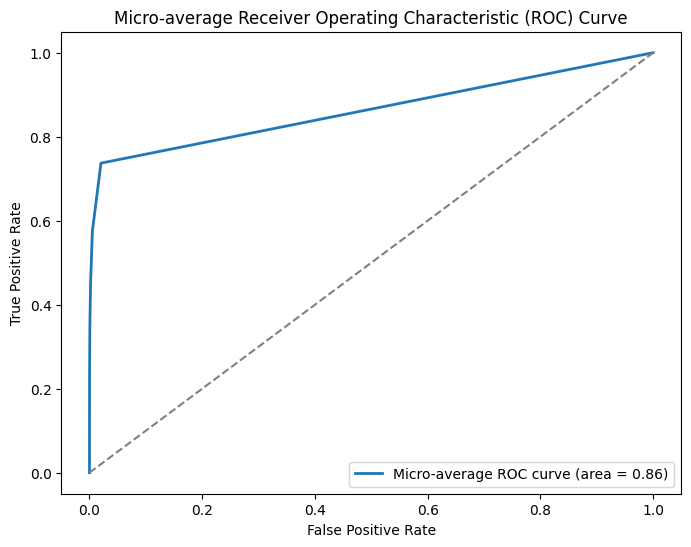

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)

n_classes = len(np.unique(target))
y_test_binary = label_binarize(y_test, classes=np.arange(n_classes))

fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'Micro-average ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### 3) Macro-average PR curve

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


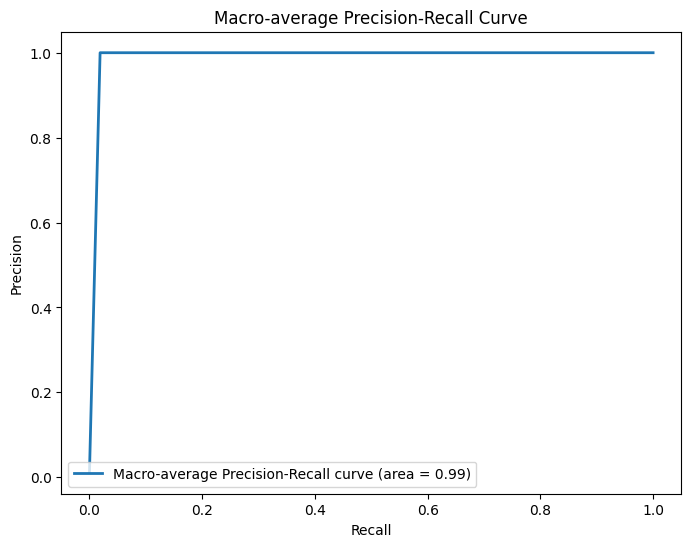

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)

n_classes = len(np.unique(target))
y_test_binary = label_binarize(y_test, classes=np.arange(n_classes))

precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

all_recall = np.unique(np.concatenate([recall[i] for i in range(n_classes)]))
mean_precision = np.zeros_like(all_recall)
for i in range(n_classes):
    mean_precision += np.interp(all_recall, recall[i], precision[i])
mean_precision /= n_classes

pr_auc["macro"] = auc(all_recall, mean_precision)

plt.figure(figsize=(8, 6))
plt.plot(all_recall, mean_precision, lw=2, label=f'Macro-average Precision-Recall curve (area = {pr_auc["macro"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-average Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
